This project consit on implementer in 1D a monotone schema for the tansport problem:
    \begin{equation}
    \inf E(\rho, v) := \int^1_0 \int_{\mathbb{R}} \frac{1}{2} |v(t, x)|^2 \rho (t, x) dt dx + \int_{\mathbb{R}} V(x) \rho(1,x)dx
    \end{equation}
restricted to:
    \begin{array}{r l}
    \partial_t \rho - \varepsilon^2 \Delta \rho + \text{div} (\rho v) = 0 \text{ on } (0, 1) \times \mathbb{R}. & (1)
    \end{array}

# Discretisation
In this part we are going to code a algorithm for the resolution of (1).
1. First, we code an algorithm to solve the heat equation:
    \begin{array}{r l}
    \partial_t \rho - \varepsilon^2 \Delta \rho  = 0 \text{ on } (0, 1) \times \mathbb{R} & (2)
    \end{array}
    with the homogeneous Neumann conditions.
    
    To solve the heat equation numericaly we are going to use the Crank-Nicolson method, which consist in the convination of the forward Euler method with the backward Euler method in this way:
    \begin{equation}
    \frac{\rho^{n+1}_i - \rho^n_i}{\Delta t} = \frac{\varepsilon^2}{2 (\Delta x)^2} \left( \left( \rho^{n+1}_{i-1} -2\rho^{n+1}_i +\rho^{n+1}_{i+1} \right)
    + \left( \rho^{n}_{i-1} -2\rho^{n}_i +\rho^{n}_{i+1} \right) \right)
    \end{equation}
    where the superindex repersent the partition in time and the subindex the partition in space.
    
    
We denote $\alpha=\frac{\varepsilon^2\Delta t}{2 (\Delta x)^2}$. Combining the above equation with the boundary conditions $\left(\frac{\partial \rho(t,0)}{\partial x}=\frac{\partial \rho(t,1)}{\partial x}=0\right)$, we have:

\begin{align}
\rho_{1}^{n+1}-\rho_{0}^{n+1}&=0\\
-\alpha \rho_{i-1}^{n+1}+(1+2\alpha)\rho_{i}^{n+1}-\alpha \rho_{i+1}^{n+1}&=
\alpha \rho_{i-1}^{n}+(1-2\alpha)\rho_{i}^{n}+\alpha \rho_{i+1}^{n},\quad \forall\; 1\leq i \leq M-1,1\leq n \leq N\\
\rho_{M}^{n+1}-\rho_{M-1}^{n+1}&=0\\
\end{align}

Which we can put in matrix form:





\begin{equation}
\left(
\begin{array}{c}
3 & -4& 1&0&\cdots&\cdots&0\\
-\alpha & 1+2\alpha & -\alpha & 0&\cdots&\cdots &0\\
0 &-\alpha & 1+2\alpha & -\alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0 &\cdots&\cdots&\cdots&-\alpha & 1+2\alpha & -\alpha \\
0 &\cdots&0&0&-3& 4& -1\\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{0}^{n+1}\\
\vdots\\
\rho_{i}^{n+1}\\
\rho_{i+1}^{n+1}\\
\vdots\\
\rho_{M}^{n+1}\\
\end{array}
\right)
=
\left(
\begin{array}{c}
0 & 0& 0&\cdots&\cdots&\cdots&0\\
\alpha & 1-2\alpha & \alpha & \cdots&\cdots&\cdots &0\\
0 & \alpha & 1-2\alpha & \alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0 &\cdots&\cdots&\cdots& \alpha & 1-2\alpha & \alpha \\
0 &\cdots&\cdots&\cdots&\cdots& 0& 0\\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{0}^{n}\\
\vdots\\
\rho_{i}^{n}\\
\rho_{i+1}^{n}\\
\vdots\\
\rho_{M}^{n}\\
\end{array}
\right)
\end{equation}

Which we write:
$$
(I-\alpha J)\rho^{n+1}=(I+\alpha J)\rho^{n};\;\;
\rho^{n+1}=(I-\alpha J)^{-1}(I+\alpha J)\rho^{n}
$$

We subsitute the first equation into the second and the last into the next-to-last:

\begin{equation}
\left(
\begin{array}{c}
 1+\alpha & -\alpha & \cdots&\cdots&\cdots &0\\
-\alpha & 1+2\alpha & -\alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0&\cdots&\cdots&-\alpha & 1+2\alpha & -\alpha\\
0 &\cdots&\cdots&0 & -\alpha & 1+\alpha \\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{1}^{n+1}\\
\vdots\\
\rho_{i}^{n+1}\\
\vdots\\
\rho_{M-1}^{n+1}\\
\end{array}
\right)
=
\left(
\begin{array}{c}
\alpha & 1-2\alpha & \alpha & \cdots&\cdots&\cdots &0\\
0 & \alpha & 1-2\alpha & \alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0 &\cdots&\cdots& \alpha & 1-2\alpha & \alpha&0 \\
0 &\cdots&\cdots&\cdots& \alpha & 1-2\alpha & \alpha \\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{0}^{n}\\
\vdots\\
\rho_{i}^{n}\\
\vdots\\
\rho_{M}^{n}\\
\end{array}
\right)
\end{equation}




Notice $I-\alpha J$ is invertible it's strictly diagonal dominant, which holds if $\vert\alpha\vert<1\iff \varepsilon^2\Delta t<2 (\Delta x)^2$

**Mass conservation**:
- Continous: The continous mass is: 
$m(t)=\int_\mathbb{R} \rho(t,x)dx$. Then
$$
m'(t)=\int_\mathbb{R} \partial_t\rho(t,x)dx
=\int_\mathbb{R} \partial_{xx}\rho(t,x)dx
=\partial_x\rho(t,\infty)-\partial_x\rho(t,-\infty)
=
0
$$

- Discrete: The discrete mass is:
$m^n=\Delta x\sum_{i=1}^{N-1}\rho^n_i$


In [210]:
#Init

%matplotlib notebook
from numpy import *
import numpy as np
from numpy.linalg import *
from scipy.sparse.linalg import *
from scipy.sparse import *


eps=0.2
M = 10
N =100

deltax=1/(M+1)
deltat=1/(N+1)
alpha=epsilon**2*deltat/2/deltax**2
assert(abs(alpha)<1)


def mass(x):
    return sum(x)

def D(M,N):
    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)


In [212]:
#Method implementation

def mass(x):
    return sum(x)

###Explicit
##
##def lhs_explicit(M,N,alpha):
##    A = np.eye(M+1)
##    A[0,0]=1
##    A[0,1]=-1
##    A[-1,-1]=1
##    A[-1,-2]=-1
##
##    return A
##
##
##def rhs_explicit(M,N,alpha):
##    a = ones(M+1)
##    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
##    Id = eye(M+1)
##    
##    B = Id +alpha*D
##    B[0,0]=0
##    B[0,1]=0
##    B[-1,-1]=0
##    B[-1,-2]=0
##    
##    return B
##
###Implicit
##def lhs_implicit(M,N,alpha):
##    a = ones(M+1)
##
##    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
##    
##    Id = eye(M+1)
##    
##    A = Id -alpha*D
##    A[0,0]=1
##    A[0,1]=-1
##    A[-1,-1]=1
##    A[-1,-2]=-1
##    return A
##
##def rhs_implicit(M,N,alpha):
##    a = ones(M+1)
##    a[0]=0
##    a[-1]=0
##
##    return spdiags(a,(0,),M+1,M+1)

#Crank-Nicolson= lhs_implicit=1/2(rhs_implicit+rhs_explicit)


def lhs_simple(M,N,alpha):
    a = ones(M+1)

    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    
    Id = eye(M+1)
    
    A = Id -alpha*D
    ##Order one boundary conditions
    #A[0,0]=1
    #A[0,1]=-1
    #A[-1,-1]=1
    #A[-1,-2]=-1
    
    ##Order two:
    A[0,0]=3
    A[0,1]=-4
    A[0,2]=1
    A[-1,-3]=-1
    A[-1,-2]=4
    A[-1,-1]=-3
    
    return A


def rhs_simple(M,N,alpha):
    a = ones(M+1)
    a[0]=0
    a[-1]=0

    A= spdiags(a,(0,),M+1,M+1)

    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = eye(M+1)
    
    B = Id +alpha*D
    B[0,0]=0
    B[0,1]=0
    B[-1,-1]=0
    B[-1,-2]=0
    
    
    return 1/2*(A+B)



In [213]:
#Discretisation
L = 1
#M = 50
x = np.linspace(0,L,M+1)
dx = x[2]- x[1]
T = 1
#N = int(1e3)
t = np.linspace(0,T,N)
dt = t[1] -t[0]



#Parameters' model
eps = 0.01
cfl = dx/(2*dt) - eps/dx
factg = 10
rho_ini = transpose([exp (-factg*(x-5)**2) ])
#rho_ini = rho_ini[1:M+1]
rho_ini = rho_ini / (dx * sum(rho_ini))
rho_ini=rho_ini.reshape(M+1)
rho_ini[0]=rho_ini[1]
rho_ini[-1]=rho_ini[-2]
V = transpose([exp (-factg*(x-2)**2) ]) + transpose([exp (-factg*(x-8)**2) ])
V = V[1:M+1]
V = 0.1 * (max(V)-V) / ( dx*sum(max(V)-V) )

#def Crank_Nicolson(M, N, dx, dt, eps, U0):
#    r = (eps**2 * dt) / (2 * dx**2)
#    a = ones(M+1)
#    A = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
#    Id = eye(M+1)
#    J = Id - r*A
#    J[0,0] = 1
#    J[0,1] = -1
#    J[M,M-1] = 1
#    J[M,M] = -1
#    B = r*A + Id
#    U = zeros([M+1, N])
#    U[:,0] = U0
#    for n in range(N-1):
#        U0[0] = 0
#        U0[-1] = 0
#        U[:,n+1] = spsolve(J, B@U0)
#        U0 = U[:,n+1]
#    return U

def Crank_Nicolson(M, N, dx, dt, eps, U0):
    alpha=eps**2*deltat/deltax**2
    assert(abs(alpha)<1)
    
    A = lhs_implicit(M,N,alpha)
    B = rhs_implicit(M,N,alpha)
    U = zeros([M+1, N])
    U[:,0] = U0
    for n in range(N-1):
        U[:,n+1] = spsolve(A, B@U0)

        U0 = U[:,n+1]

    return U

<IPython.core.display.Javascript object>


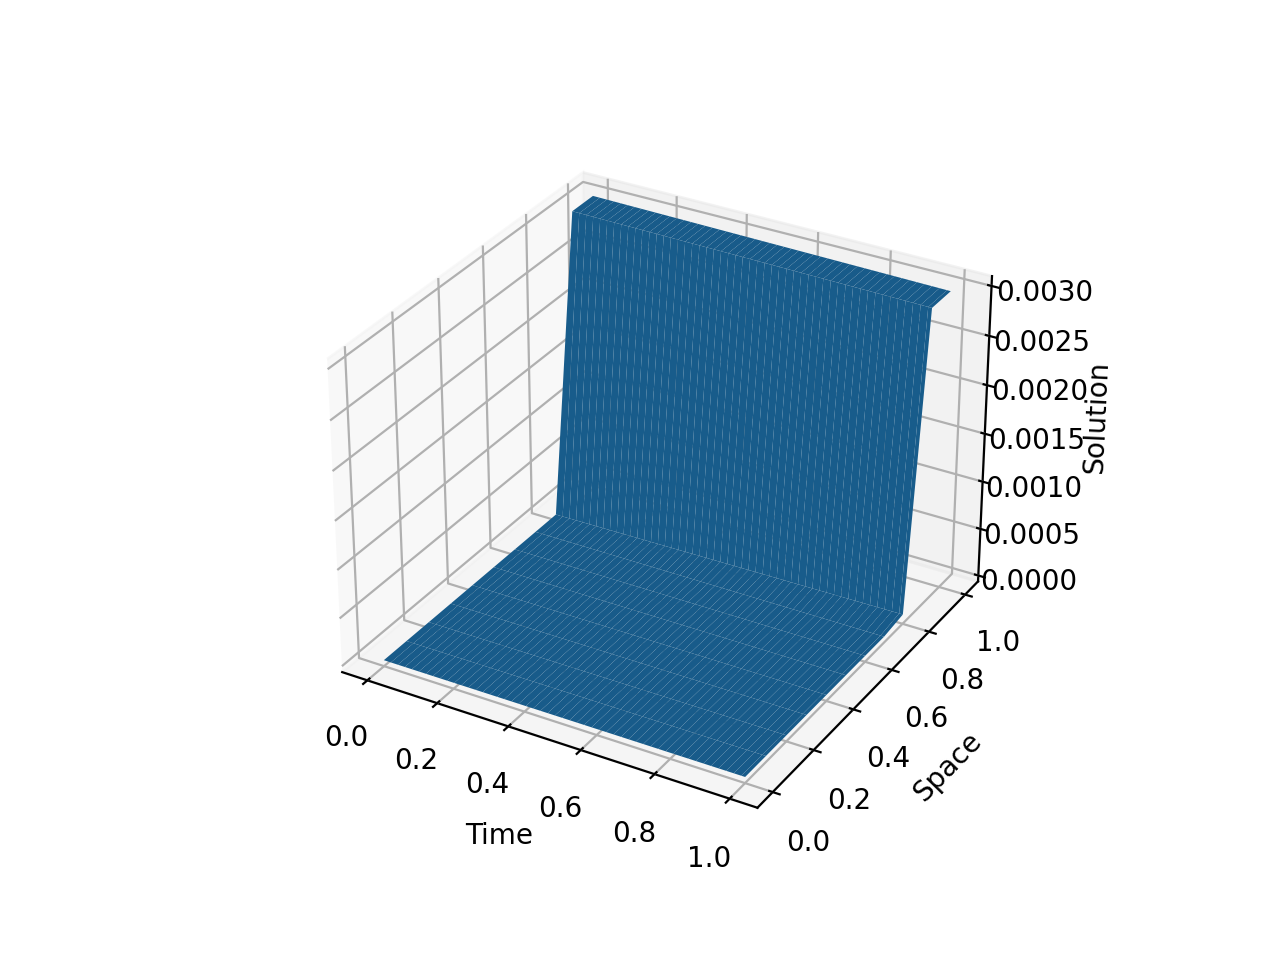

Text(0.5, 0, 'Solution')

In [214]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

sol=Crank_Nicolson(M, N, dx, dt, eps, rho_ini)

 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X,Y=meshgrid(t,x)

ax.plot_surface(X,Y,sol.reshape(X.shape))

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Solution')

2. Now we are going to code an algorithm to solve (2). We are going to add to the previous algorithm a Godunov's schema to discretise the term div$(\rho v)$:
\begin{equation}
\text{div}(\rho v) \approx \frac{\Delta t}{\Delta x} \left( \rho^n_{i+1/2} v^n_{i+1/2} - \rho^n_{i-1/2} v^n_{i-1/2} \right),
\end{equation}
where $i$ is the space's index and $n$ is the time's index and we define:
\begin{equation}
\rho^i_{i+1/2} = \left\{
\begin{array}{rcl}
\rho^n_{i+1} & \text{if} & v^n_{i+1/2} <0 \\
\rho^n_i & \text{if} & v^n_{i+1/2} \ge 0.
\end{array}
\right.
\end{equation}
We are going to verify also if $\rho$ is possitive for each pass of temps over the condition:
\begin{equation}
|v^n_{i+1/2}| \leq \lambda : = \frac{\Delta x}{2 \Delta x} - \varepsilon^2 \frac{1}{\Delta x}, ~~ \forall i = 1, \ldots, M-1.
\end{equation}

For verify this condition theoreticaly: (NO ENTIENDO QUE TIENE QUE VER UNA COSA CON LA OTRA)

In [ ]:
v[1,2]

In [ ]:
def rho_half (rho, v):
    # rho, v : column vectors of dim M
    rho_half = zeros([M,1])
    for i in range (M):
        if v[i] < 0:
            rho_half[i] = rho[i+1]
        else:
            rho_half[i] = rho[i]
    return rho_half

def Godunov(M, N, dx, dt, eps, U0, v, l):
    # v : MxN matrix
    r = (eps**2 * dt) / (2 * dx**2)
    a = ones(M+1)
    A = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = eye(M+1)
    J = Id - r*A
    J[0,0] = 1
    J[0,1] = -1
    J[M,M-1] = 1
    J[M,M] = -1
    B = r*A + Id
    U = zeros([M+1, N])
    G = zeros(M+1)
    U[:,0] = U0
    if all(abs(v)) <= l:
        for n in range(N-1):
            U_half = rho_half(U0,v[:,n])
            U0[0] = 0
            U0[-1] = 0
            if all(U_half) >= 0:
                for i in range(1,M):
                    G[i] = dt**2/dx * (U_half[i]*v[i,n] - U_half[i-1]*v[i-1,n])
            else:
                print('U_half < 0 for t =' str(n))
                break
            U[:,n+1] = spsolve(J, B@U0 - G)
            U0 = U[:,n+1]
    else:
        print('v > lambda')
    return U


#v=rand(M+1,N,density=0.3)
v= 1000*np.random.rand(M+1,N)
l = dx/(2*dt) - eps**2 /dx

sol=Godunov(M, N, dx, dt, eps, rho_ini,v,l)

 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X,Y=meshgrid(t,x)

ax.plot_surface(X,Y,sol.reshape(X.shape))

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Solution')

3. We aregoing to prove that ths schema could be writen on the form:
    \begin{equation}
    \rho^{i+1} = \left( A + B(v^i) \right) \rho^i.
    \end{equation}
    

In [7]:
a = np.array([1, 2, 1, 2])
all(a>0)

True


$$
\left(
\begin{array}{c}
0\\
\alpha \rho_{0}^n+(1-2\alpha)\rho_1^n+\alpha\rho_2^n\\
\vdots\\
\alpha \rho_{i}^n+(1-2\alpha)\rho_{i}^n+\alpha\rho_{i+1}^n\\
\vdots\\
\alpha \rho_{M-2}^n+(1-2\alpha)\rho_{M-1}^n+\alpha\rho_M^n\\
0
\end{array}
\right)
$$

**Debug test**: Show that the method conserves the mass

In [127]:
##Debug test Crank-Nicolson
from scipy.sparse.linalg import inv

def lhs_cn(M,N):
    A = eye(M+1) -alpha*D(M,n)
    A[0,0]=1
    A[0,1]=-1
    A[-1,-1]=1
    A[-1,-2]=-1
    return A

def rhs_cn(M,N):
    B = eye(M+1) +alpha*D(M,N)
    B[0,0]=0
    B[0,1]=0
    B[-1,-1]=0
    B[-1,-2]=0
    
    return B

   
A=lhs_cns(M,N)
B=rhs_cns(M,N)

v = np.random.rand(M+1,1)

sol = spsolve(A,B@v)

mass(v),mass(sol)

(506.6351247667378, 506.29347767600365)

**Debug test**: Perhaps a simpler method does preserve the mass

In [154]:
##Test mass conservation simpler methods
##Explicit Euler

from scipy.sparse.linalg import inv

def lhs_simple(M,N,alpha):
    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = np.eye(M+1)
    
    A = 1*Id
    A[0,0]=1
    A[0,1]=-1
    A[-1,-1]=1
    A[-1,-2]=-1
    return A

def rhs_simple(M,N,alpha):
    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = eye(M+1)
    
    B = Id +alpha*D
    B[0,0]=0
    B[0,1]=0
    B[-1,-1]=0
    B[-1,-2]=0
    
    return B

   
epsilon=0.2
M = 1000
N =100000

deltax=1/(M+1)
deltat=1/(N+1)
alpha=epsilon**2*deltat/2/deltax**2
assert(abs(alpha)<1)

A=lhs_simple(M,N,alpha)
B=rhs_simple(M,N,alpha)

v = np.random.rand(M+1,1)

sol = spsolve(A,B@v)

abs(mass(v)-mass(sol))

0.21438581305204707

In [159]:
##Test mass conservation simpler methods
##Implicit Euler in space

from scipy.sparse.linalg import inv

def lhs_simple(M,N,alpha):
    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = eye(M+1)
    
    A = Id -alpha*D
    A[0,0]=1
    A[0,1]=-1
    A[-1,-1]=1
    A[-1,-2]=-1
    return A

def rhs_simple(M,N,alpha):
    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = np.eye(M+1)
    
    B = Id
    B[0,0]=0
    B[0,1]=0
    B[-1,-1]=0
    B[-1,-2]=0
    
    return B



def mass(x):
    return sum(x)
   
epsilon=0.2
M = 1000
N =100000

deltax=1/(M+1)
deltat=1/(N+1)
alpha=epsilon**2*deltat/deltax**2
assert(abs(alpha)<1)

A=lhs_simple(M,N,alpha)
B=rhs_simple(M,N,alpha)

v = np.random.rand(M+1,1)

sol = spsolve(A,B@v)

abs(mass(v)-mass(sol))

0.5017892657269272

In [158]:
B-np.zeros(B.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
l = spsolve(A,B@v)
mass(l)

4.660169500488096

In [98]:
w = inv(A)@B@v
w

array([[0.21811919],
       [0.21811919],
       [0.27204837],
       [0.40415247],
       [0.57672326],
       [0.64655431],
       [0.47648714],
       [0.45566822],
       [0.47298803],
       [0.45965466],
       [0.45965466]])

In [94]:
w,mass(w),abs(mass(w-v))

(array([[0.21811919],
        [0.21811919],
        [0.27204837],
        [0.40415247],
        [0.57672326],
        [0.64655431],
        [0.47648714],
        [0.45566822],
        [0.47298803],
        [0.45965466],
        [0.45965466]]),
 4.660169500488097,
 0.5708427372747389)

In [63]:
inv(A)*B-np.zeros(A.shape)

matrix([[1.85565460e-01, 5.01393268e-01, 2.64043853e-01, 4.13283119e-02,
         6.46873368e-03, 1.01249037e-03, 1.58475992e-04, 2.48070362e-05,
         3.89733582e-06, 6.25490454e-07, 7.73078089e-08],
        [1.85565460e-01, 5.01393268e-01, 2.64043853e-01, 4.13283119e-02,
         6.46873368e-03, 1.01249037e-03, 1.58475992e-04, 2.48070362e-05,
         3.89733582e-06, 6.25490454e-07, 7.73078089e-08],
        [2.90448239e-02, 2.34999029e-01, 4.64243186e-01, 2.29184275e-01,
         3.58720686e-02, 5.61471930e-03, 8.78821410e-04, 1.37566292e-04,
         2.16124986e-05, 3.46862888e-06, 4.28706940e-07],
        [4.54611431e-03, 3.67821976e-02, 2.29184275e-01, 4.58786943e-01,
         2.28330261e-01, 3.57383996e-02, 5.59380960e-03, 8.75626873e-04,
         1.37566292e-04, 2.20782622e-05, 2.72877398e-06],
        [7.11560705e-04, 5.75717297e-03, 3.58720686e-02, 2.28330261e-01,
         4.58653274e-01, 2.28309351e-01, 3.57352051e-02, 5.59380960e-03,
         8.78821410e-04, 1.41043633e-0

In [57]:
B-np.zeros(A.shape)

matrix([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.22, 0.56, 0.22, 0.  , 0.  , 0.  ],
        [0.  , 0.22, 0.56, 0.22, 0.  , 0.  ],
        [0.  , 0.  , 0.22, 0.56, 0.22, 0.  ],
        [0.  , 0.  , 0.  , 0.22, 0.56, 0.22],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [65]:
J-np.zeros(J.shape)

matrix([[ 1.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [-0.22,  1.44, -0.22,  0.  ,  0.  ,  0.  ],
        [ 0.  , -0.22,  1.44, -0.22,  0.  ,  0.  ],
        [ 0.  ,  0.  , -0.22,  1.44, -0.22,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.22,  1.44, -0.22],
        [ 0.  ,  0.  ,  0.  ,  0.  , -1.  ,  1.  ]])